In [8]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

Part 1. 1 a - Read all the 3 CSV files as DataFrame and store them into 3 separate variables.

In [205]:
normaldf = pd.read_csv(r'C:\Personal\AI\Supervised\Project\Normal.csv')
typehdf=pd.read_csv(r'C:\Personal\AI\Supervised\Project\Type_H.csv')
typeSdf=pd.read_csv(r'C:\Personal\AI\Supervised\Project\Type_S.csv')

Part 1.1 b - Print Shape and columns of all the 3 DataFrames

In [206]:
normaldf.shape

(100, 7)

In [207]:
typehdf.shape

(60, 7)

In [208]:
typeSdf.shape

(150, 7)

In [209]:
normaldf.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [210]:
typehdf.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [211]:
typeSdf.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


In [212]:
normaldf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
P_incidence,100.0,NaN,NaN,NaN,51.685244,12.368161,30.741938,42.817849,50.123115,61.470097,89.834676
P_tilt,100.0,NaN,NaN,NaN,12.821414,6.778503,-5.845994,8.799951,13.482435,16.785953,29.894119
L_angle,100.0,NaN,NaN,NaN,43.542605,12.361388,19.071075,35.0,42.638923,51.602346,90.563461
S_slope,100.0,NaN,NaN,NaN,38.86383,9.624004,17.386972,32.340487,37.059694,44.608788,67.19546
P_radius,100.0,NaN,NaN,NaN,123.890834,9.014246,100.501192,118.182659,123.874328,129.040401,147.894637
S_Degree,100.0,NaN,NaN,NaN,2.186572,6.307483,-11.058179,-1.51136,1.15271,4.968807,31.172767
Class,100,2,Normal,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
typehdf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
P_incidence,60.0,NaN,NaN,NaN,47.638407,10.697131,26.147921,41.018099,46.416169,53.922329,74.433593
P_tilt,60.0,NaN,NaN,NaN,17.398795,7.016708,3.144669,12.874329,16.949285,22.00298,41.557331
L_angle,60.0,NaN,NaN,NaN,35.463524,9.767795,14.0,29.038069,35.164873,42.011563,62.275275
S_slope,60.0,NaN,NaN,NaN,30.239612,7.555388,13.366931,25.215275,30.000659,34.962103,46.613539
P_radius,60.0,NaN,NaN,NaN,116.474968,9.35572,84.241415,112.28032,116.696146,122.042999,137.540613
S_Degree,60.0,NaN,NaN,NaN,2.480251,5.531177,-10.675871,-0.910819,2.542441,6.059666,15.779697
Class,60,2,Type_H,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
typeSdf.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
P_incidence,150.0,NaN,NaN,NaN,71.514224,15.109337,37.90391,60.658136,72.149306,81.075893,129.834041
P_tilt,150.0,NaN,NaN,NaN,20.748038,11.506169,-6.554948,13.461149,19.309548,29.22968,49.431864
L_angle,150.0,NaN,NaN,NaN,64.110108,16.397068,24.710274,52.0,62.5552,76.990924,125.742385
S_slope,150.0,NaN,NaN,NaN,50.766186,12.318813,19.290046,43.166815,50.751695,56.675435,121.429566
P_radius,150.0,NaN,NaN,NaN,114.51881,15.579995,70.082575,104.706761,114.8424,123.337307,163.071041
S_Degree,150.0,NaN,NaN,NaN,51.896687,40.10803,1.010041,30.393271,42.372509,61.894425,418.543082
Class,150,2,Type_S,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Part 1.1 c - Compare Column names of all the 3 DataFrames and clearly write observations

In [215]:
train_cols = normaldf.columns
test_cols = typehdf.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

print(common_cols)
print(train_not_test)

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Index([], dtype='object')


In [216]:
train_cols = typehdf.columns
test_cols = typeSdf.columns

common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

print(common_cols)
print(train_not_test)

Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Index([], dtype='object')


There is no Difference in the Column name's between 3 data frames as the difference index null.

Part 1.1 d - Print DataTypes of all the 3 DataFrames

In [217]:
normaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [218]:
typehdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [219]:
typeSdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


Part 1.1 e - Observe and share variation in ‘Class’ feature of all the 3 DaraFrames

In [220]:
normaldf['Class'].unique()

array(['Normal', 'Nrmal'], dtype=object)

In [221]:
typehdf['Class'].unique()

array(['Type_H', 'type_h'], dtype=object)

In [222]:
typeSdf['Class'].unique()

array(['Type_S', 'tp_s'], dtype=object)

Part 1.2 a - Unify all the variations in ‘Class’ feature for all the 3 DataFrames

In [223]:
normaldf['Class']=normaldf['Class'].replace('Nrmal', 'Normal')
normaldf['Class'].unique()

array(['Normal'], dtype=object)

In [224]:
typehdf['Class']=typehdf['Class'].replace('type_h', 'Type_H')
typehdf['Class'].unique()

array(['Type_H'], dtype=object)

In [225]:
typeSdf['Class']=typeSdf['Class'].replace('tp_s', 'Type_S')
typeSdf['Class'].unique()

array(['Type_S'], dtype=object)

Part 1.2 b - Combine all the 3 DataFrames to form a single DataFrame

In [226]:
NormTypeHSDf = pd.concat([normaldf, typehdf,typeSdf], ignore_index=True, sort=False)
print(NormTypeHSDf)

     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
0      38.505273  16.964297  35.112814  21.540976  127.632875    7.986683   
1      54.920858  18.968430  51.601455  35.952428  125.846646    2.001642   
2      44.362490   8.945435  46.902096  35.417055  129.220682    4.994195   
3      48.318931  17.452121  48.000000  30.866809  128.980308   -0.910941   
4      45.701789  10.659859  42.577846  35.041929  130.178314   -3.388910   
..           ...        ...        ...        ...         ...         ...   
305    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
306    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
307    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
308    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
309    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
0    Normal  
1    Normal  
2    Normal  
3    Normal  
4    

In [227]:
NormTypeHSDf.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
309,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


Part 1.2 c - Print 5 random samples of this DataFrame

In [228]:
NormTypeHSDf.sample(n = 5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
61,42.515610,16.541216,42.000000,25.974394,120.631941,7.876731,Normal
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
64,43.191915,9.976664,28.938149,33.215251,123.467400,1.741018,Normal
197,74.720746,19.756942,82.735360,54.963804,109.356594,33.306067,Type_S
154,41.171680,17.321206,33.469403,23.850474,116.377889,-9.569250,Type_H


Part 1.2 d - Print Feature-wise percentage of Null values

In [229]:
round((NormTypeHSDf.isnull().sum()*100)/len(NormTypeHSDf),2)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

Check 5-point summary of the new DataFrame

In [230]:
NormTypeHSDf.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


Visualize a heatmap to understand correlation between all features

C:\Users\A462766\AppData\Local\Temp\ipykernel_60792\979408209.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=NormTypeHSDf.corr(),annot=True);


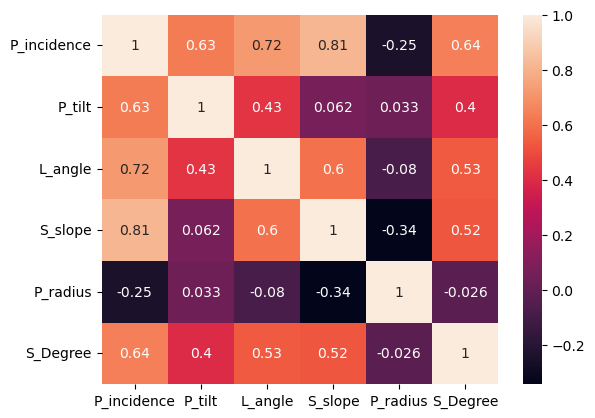

In [231]:
sns.heatmap(data=NormTypeHSDf.corr(),annot=True);

JUst Reference

In [232]:
NormTypeHSDf.corr()

C:\Users\A462766\AppData\Local\Temp\ipykernel_60792\460761554.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  NormTypeHSDf.corr()


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


B. Share insights on correlation

A. Features having stronger correlation with correlation value.

S_slope with P_incidence is having a stronger Correlation, Positively correlated

B. Features having weaker correlation with correlation value

P_radius with L_angle is having the less correlation, That is negatively correlated

C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]

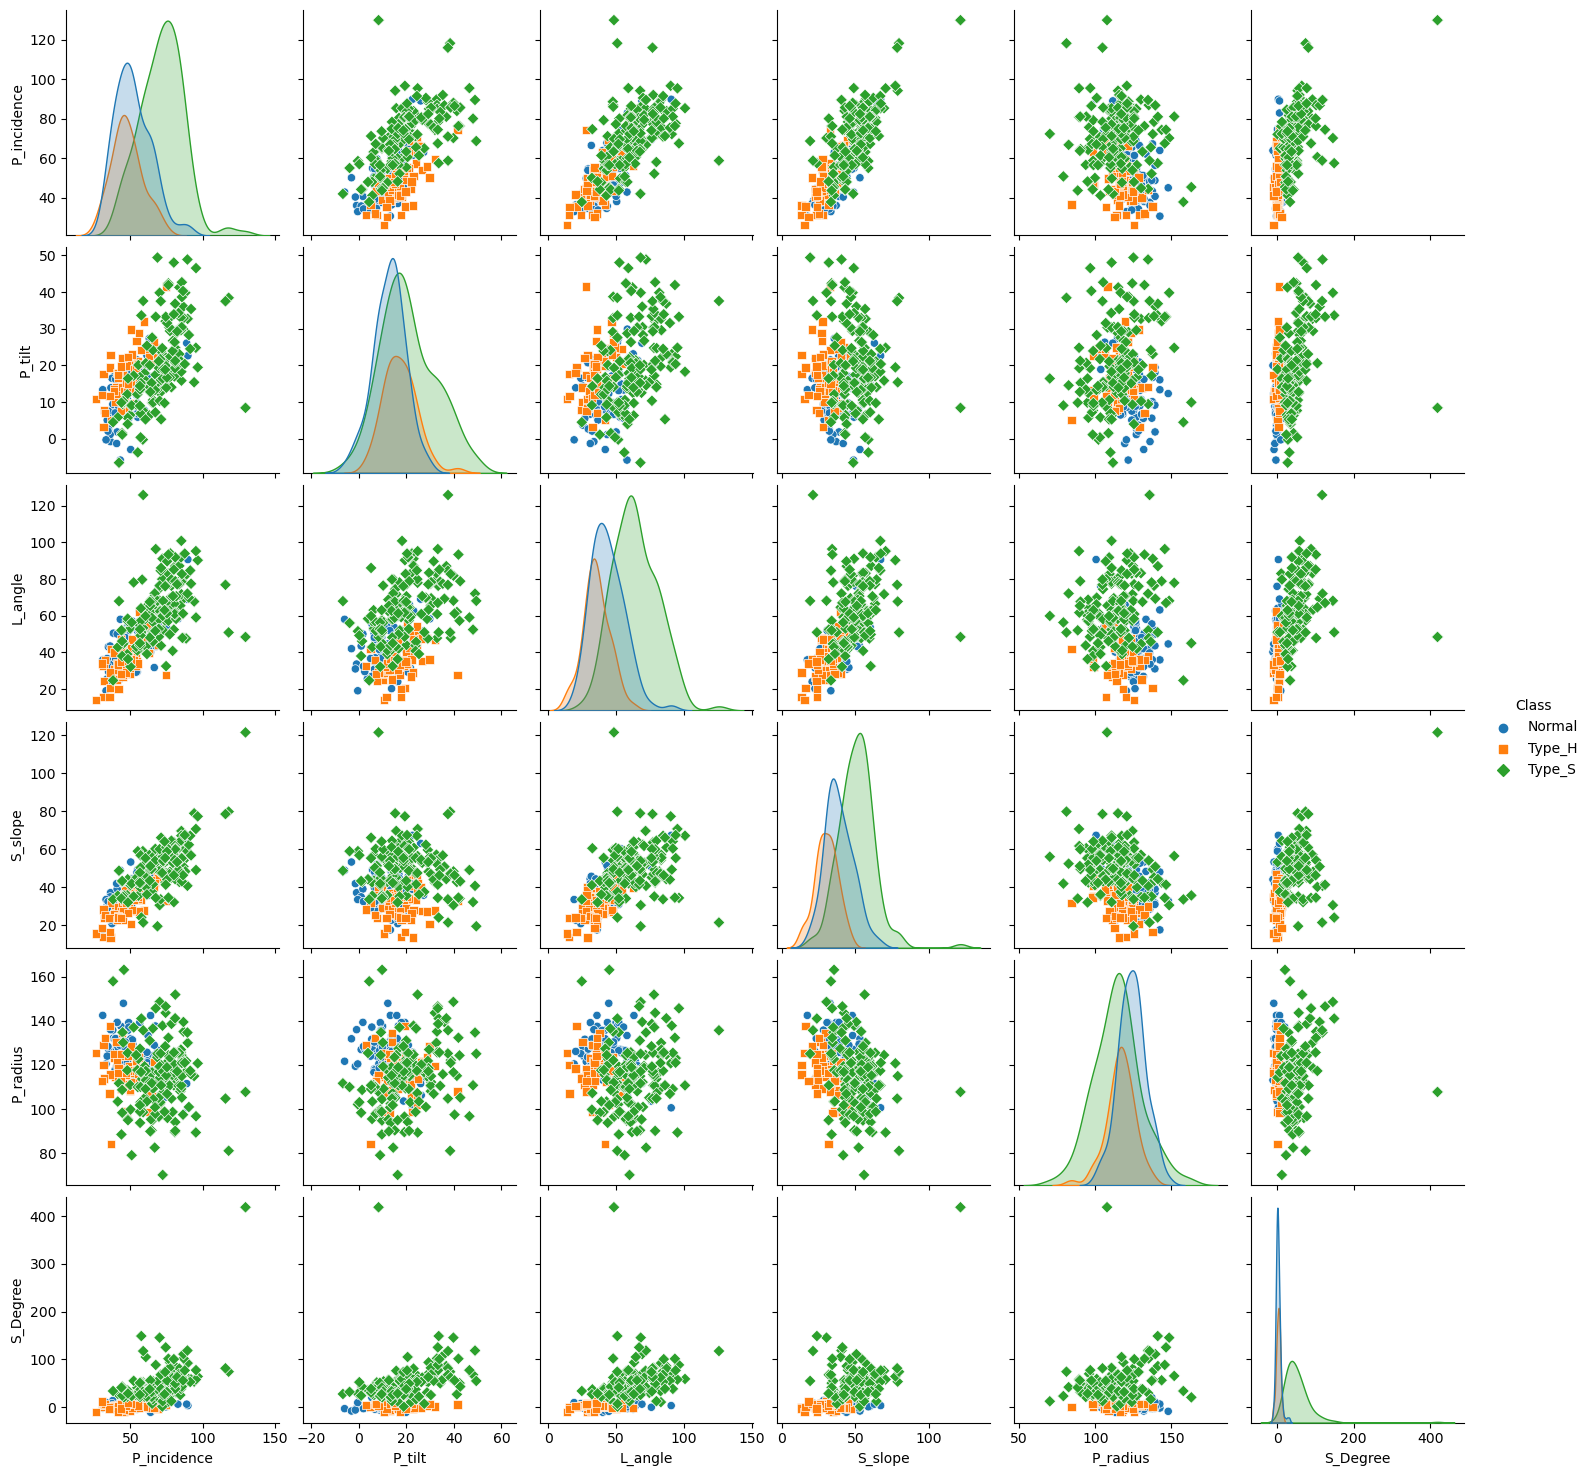

In [235]:
sns.pairplot(data=NormTypeHSDf, hue='Class',markers=["o", "s", "D"])

P_incidence is positively correlated with S_degree,S_Slope,L_angle,P_tilt for all 3 Class type, negatively corrlated with P_radius, so increase in the P_incidence will negatively effect the radius, 

P_radius is least effected as it is negatively correlated with incidenc,slope,angle and degree.


Type_S data is normally distributed. S_Degree is more Skewed in both Normal and Type_H.
We can see there are more outliers in the Class type_S in S_slope, P_radius, S_degree and P_incidence.

D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]

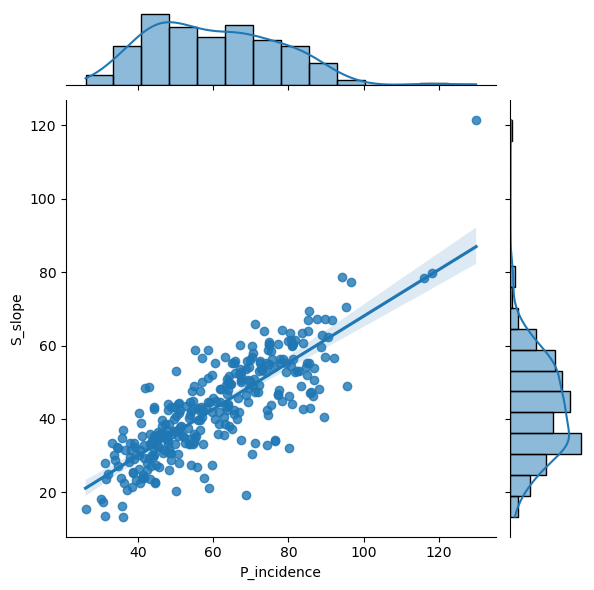

In [236]:
sns.jointplot(data=NormTypeHSDf, x='P_incidence', y='S_slope',kind="reg");

S_slope and P_incidence is positively correlated as shown in scattered bivariant 
S_slope and P_incidence is normally distributed as shown in Univariant Bar grap

E. Visualize a boxplot to check distribution of the features and share insights.

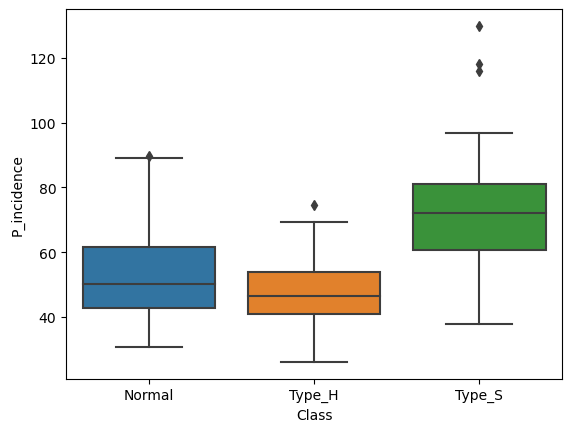

In [237]:
sns.boxplot(data=NormTypeHSDf, x='Class',y='P_incidence');

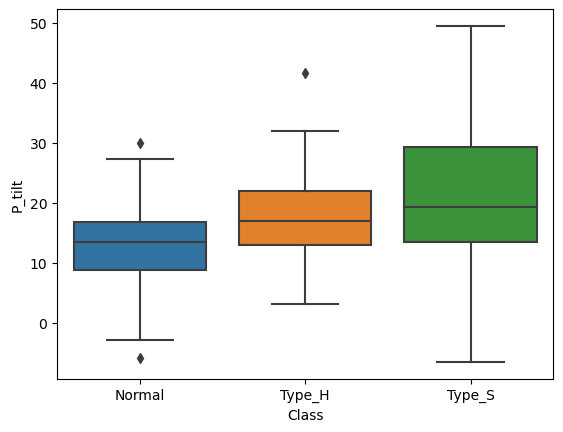

In [238]:
sns.boxplot(data=NormTypeHSDf, x='Class',y='P_tilt');

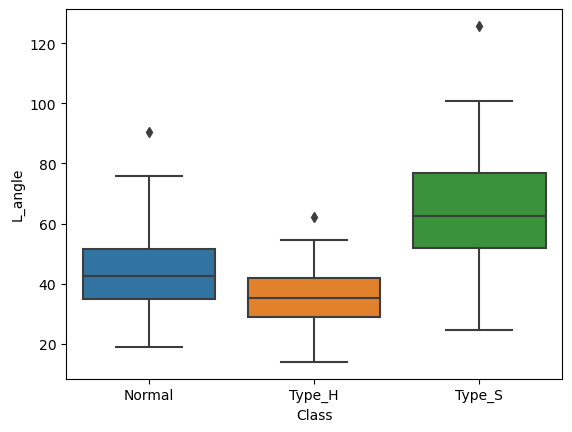

In [239]:
sns.boxplot(data=NormTypeHSDf, x='Class',y='L_angle');

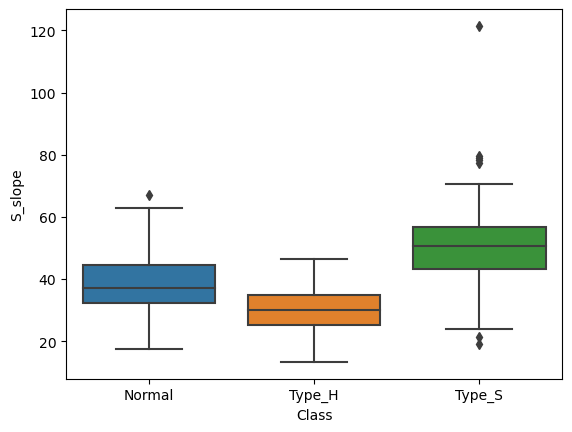

In [240]:
sns.boxplot(data=NormTypeHSDf, x='Class',y='S_slope');

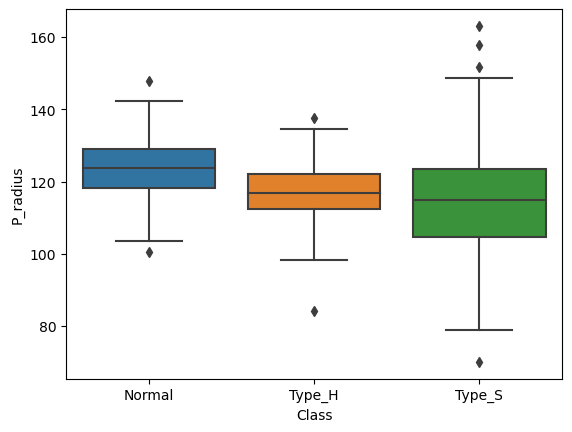

In [241]:
sns.boxplot(data=NormTypeHSDf, x='Class',y='P_radius');

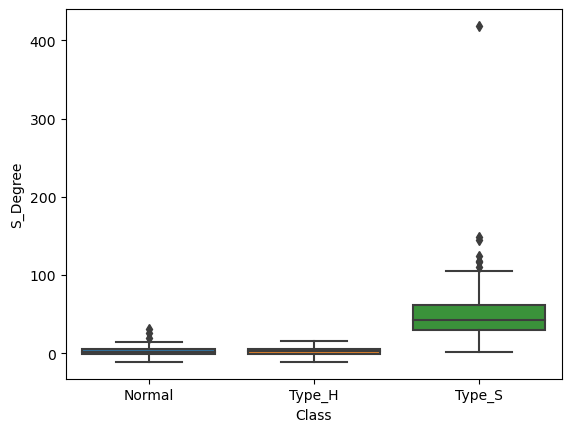

In [242]:
sns.boxplot(data=NormTypeHSDf, x='Class',y='S_Degree');

Type_S have more outliers compared to Type_H and Normal.
P_incidence is positively skewed in all 3 class
P_tilt have no outliers in Type_S but have outliers both in Type_H and Normal.
L_angle have positively skewed 
S_slope have outliers in Normal and type_S and positively Skewed
P_radius is positively skewed in Type_S
S_Degree is positively Skewed in Normal and Type_S.

4. Model Building
A. Split data into X and Y.

#condition=[NormTypeHSDf['Class']=='Normal',
          NormTypeHSDf['Class']=='Type_H',
          NormTypeHSDf['Class']=='Type_S']

#values=['0','1','2']

#NormTypeHSDf['Class'] = np.select(condition, values)

In [311]:
NormTypeHSDf.tail()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S
309,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,Type_S


In [312]:
x = NormTypeHSDf[['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']]
y = NormTypeHSDf['Class']

In [313]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
cols=x_train.columns
x_train.columns = cols
x_test.columns = cols

print("{0:0.2f}% data is in training set".format((len(x_train)/len(NormTypeHSDf.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(NormTypeHSDf.index)) * 100))

80.00% data is in training set
20.00% data is in test set


In [314]:
x_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
132,44.936675,17.443838,27.780576,27.492837,117.980324,5.569620
208,63.172987,6.330911,63.000000,56.842076,110.644021,42.608076
62,39.358705,7.011262,37.000000,32.347443,117.818760,1.904048


In [315]:
Class_model = GaussianNB()
Class_model.fit(x_train, y_train.ravel())
class_train_predict = Class_model.predict(x_train)
class_test_predict = Class_model.predict(x_test)

Confusion Matrix


<Axes: >

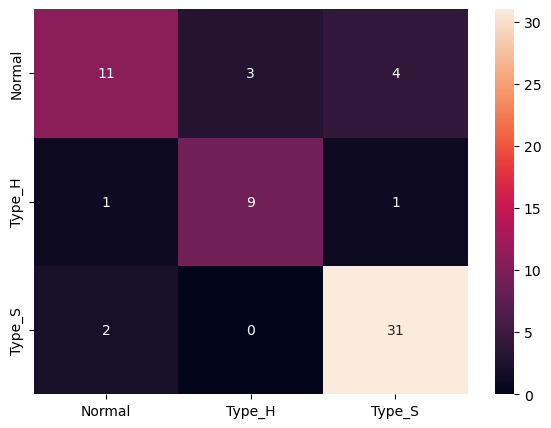

In [317]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, class_test_predict)

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],
                  columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Normal:TP=11, FN=7, FP=3, TN=49
Type_H:TP=9, FN=2, FP=4, TN=48
Type_S: TP=31, FN=3, FP=5, TN=24

True Positives (TP): we correctly predicted that LoanOnCard.

True Negatives (TN): we correctly predicted its not LoanOncard.

False Positives (FP): we incorrectly predicted that its loanOncard (a "Type I error"),Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted not loanOnCard (a "Type II error"),Falsely predict negative Type II error

In [318]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Normal       0.67      0.89      0.76        18
      Type_H       0.88      0.64      0.74        11
      Type_S       0.97      0.88      0.92        33

    accuracy                           0.84        62
   macro avg       0.84      0.80      0.81        62
weighted avg       0.86      0.84      0.84        62



In [319]:
print('Accuracy on Training data:', knn.score(x_train,y_train))
print('Accuracy on Testing data:', knn.score(x_test,y_test))

Accuracy on Training data: 0.8911290322580645
Accuracy on Testing data: 0.8387096774193549


From the classification report, it can be seen that the model has an average performance of around 80% ranging from precision, recall, f1-score, and support.
Accuracy also shows in value of 89% in Training and  83% in Testing Data.
ROC=74%

In [320]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
best_model = clf.fit(x,y)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 25


From GridSearch, it can be seen that the best number of leaf_size is 1 while the optimal distance method is Manhattan or p = 2.
Then the most optimal number of K is 25.

In [321]:
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Normal       0.75      0.83      0.79        18
      Type_H       0.73      0.73      0.73        11
      Type_S       0.97      0.91      0.94        33

    accuracy                           0.85        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.86      0.85      0.86        62



Using Hyperparameters Tuning can improve model performance by about 20% to a range of 92% for all evaluation matrices.
Accuracy also shows in value of 92%.
The ROC value also increased to 90%

In [322]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

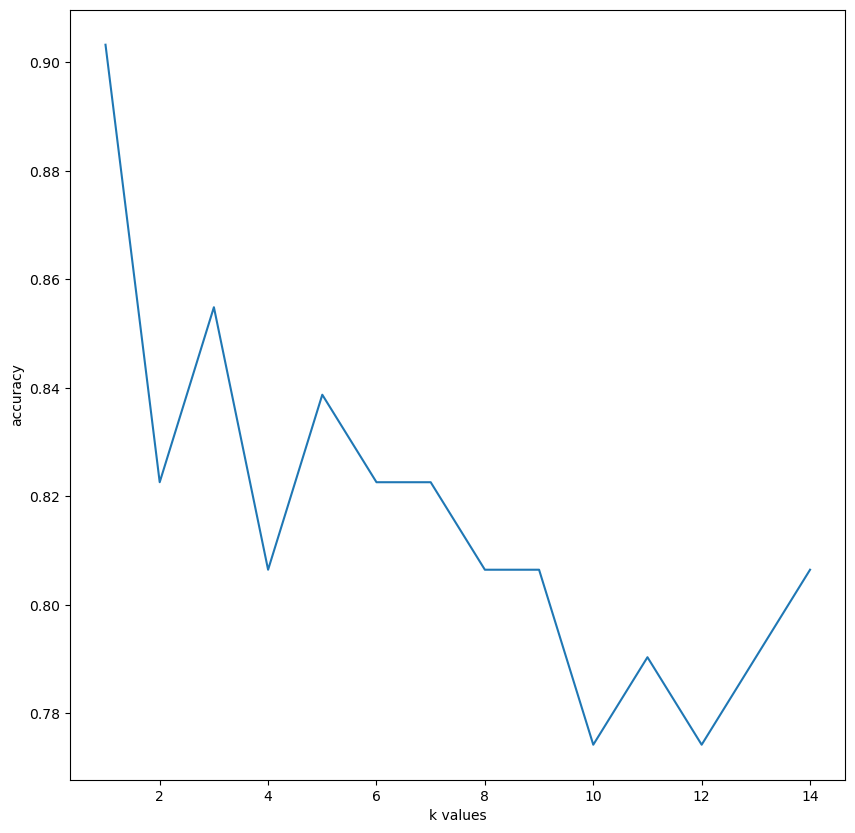

In [259]:
score_list = []

for each in range (1,15):
    knn_o = KNeighborsClassifier(n_neighbors = each)
    knn_o.fit(x_train, y_train)
    score_list.append(knn_o.score(x_test, y_test))

plt.figure(figsize = (10,10))
plt.plot(range(1,15), score_list)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

From the above plot the max test accuracy is 90% and K value is 1.

In [323]:
df=pd.concat([normaldf,typehdf,typeSdf], ignore_index=True, sort=False)

### If We consider the Type_S and Type_H as False and Normal as True 

In [324]:
df['Class'] = [True if each == 'Normal' else False for each in df['Class']]

In [325]:
n_true = len(df.loc[df['Class'] == True])
n_false = len(df.loc[df['Class'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 100 (32.26%)
Number of false cases: 210 (67.74%)


In [326]:
X = df.drop('Class',axis=1)     # Predictor feature columns (8 X m)

Y = df['Class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# 1 is just any random seed number

x_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
132,44.936675,17.443838,27.780576,27.492837,117.980324,5.569620
208,63.172987,6.330911,63.000000,56.842076,110.644021,42.608076
62,39.358705,7.011262,37.000000,32.347443,117.818760,1.904048


In [327]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df.index)) * 100))

80.00% data is in training set
20.00% data is in test set


In [328]:
print("Original True Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['Class'] == 1]), (len(df.loc[df['Class'] == 1])/len(df.index)) * 100))
print("Original False Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['Class'] == 0]), (len(df.loc[df['Class'] == 0])/len(df.index)) * 100))
print("")
print("Training True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original True Values    : 100 (32.26%)
Original False Values   : 210 (67.74%)

Training True Values    : 82 (33.06%)
Training False Values   : 166 (66.94%)

Test True Values        : 18 (29.03%)
Test False Values       : 44 (70.97%)



In [329]:
x_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
132,44.936675,17.443838,27.780576,27.492837,117.980324,5.569620
208,63.172987,6.330911,63.000000,56.842076,110.644021,42.608076
62,39.358705,7.011262,37.000000,32.347443,117.818760,1.904048


In [330]:

cols=x_train.columns

x_train.columns = cols
x_test.columns = cols

x_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
132,44.936675,17.443838,27.780576,27.492837,117.980324,5.569620
208,63.172987,6.330911,63.000000,56.842076,110.644021,42.608076
62,39.358705,7.011262,37.000000,32.347443,117.818760,1.904048


In [331]:
# creatw the model
Class_model = GaussianNB()

Class_model.fit(x_train, y_train.ravel())

GaussianNB()

In [332]:
class_train_predict = Class_model.predict(x_train)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, class_train_predict)))
print()

Model Accuracy: 0.7782



In [333]:
class_test_predict = Class_model.predict(x_test)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, class_test_predict)))
print()

Model Accuracy: 0.7742



Confusion Matrix


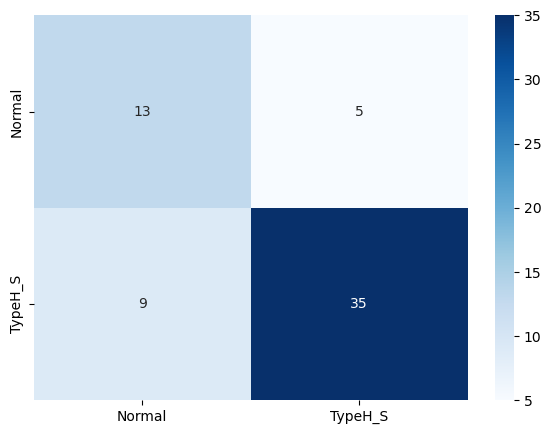

In [334]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, class_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","TypeH_S"]],
                  columns = [i for i in ["Normal","TypeH_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.show()

In [335]:
knn = KNeighborsClassifier()
x = df.drop(columns=['Class'])
y = df['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

       False       0.81      0.85      0.83        40
        True       0.70      0.64      0.67        22

    accuracy                           0.77        62
   macro avg       0.75      0.74      0.75        62
weighted avg       0.77      0.77      0.77        62



0.7431818181818182

1.5

In [336]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [337]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [338]:
knn_2 = KNeighborsClassifier()

In [339]:
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [340]:
best_model = clf.fit(x,y)

In [341]:
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 7


In [342]:
y_pred = best_model.predict(x_test)

In [343]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.93      0.95      0.94        40
        True       0.90      0.86      0.88        22

    accuracy                           0.92        62
   macro avg       0.92      0.91      0.91        62
weighted avg       0.92      0.92      0.92        62



In [344]:
roc_auc_score(y_test, y_pred)

0.9068181818181819

PART - B

In [9]:
Data1=pd.read_csv(r'C:\Personal\AI\Supervised\Project\Data1.csv')
Data2=pd.read_csv(r'C:\Personal\AI\Supervised\Project\Data2.csv')

In [10]:
Data1.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1
3,4,35,9,100,94112,1,2.7,2
4,5,35,8,45,91330,4,1.0,2


In [11]:
Data2.head()

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN
3,4,0,0,0,0,0,NaN
4,5,0,0,0,0,1,NaN


In [12]:
Data1.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
dtype: int64

In [13]:
Data2.isnull().sum()

ID                      0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [14]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [15]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [16]:
Data1.shape

(5000, 8)

In [17]:
Data2.shape

(5000, 7)

Part 2.1 c - Merge both the Dataframes on ‘ID’ feature to 
form a single DataFrame

In [18]:
Data = pd.merge(Data1, Data2, on='ID')

In [19]:
Data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


Part 2.1 d - Change Datatype of below features to 
‘Object’ 

In [20]:
Data[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']] = Data[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']].astype(np.object)

C:\Users\A462766\AppData\Local\Temp\ipykernel_49056\2699628003.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Data[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']] = Data[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']].astype(np.object)


In [21]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


Part 2.2 a - Visualize distribution of Target variable 
‘LoanOnCard’ and clearly share insights

<Axes: xlabel='LoanOnCard', ylabel='Count'>

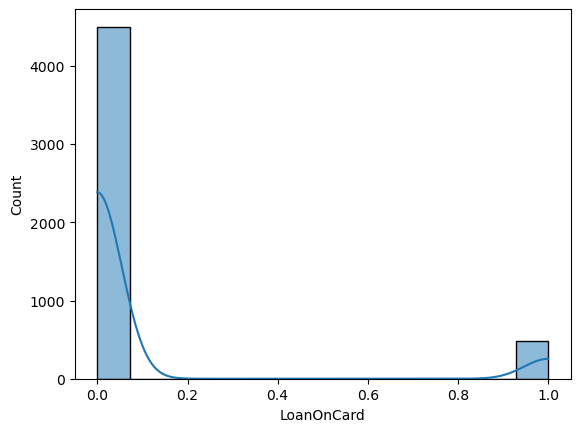

In [22]:
sns.histplot(data=Data, x='LoanOnCard', kde=True)

LoanOncard is not normally distributed, There is one outlier.  there are 20 null values and all the values are either 1 or 0(True or false) there are more than 4800 '1' values which can be said as 'True'

Part 2.2 b - Check the percentage of missing values and 
impute if required

In [23]:
round((Data.isnull().sum()*100)/len(Data),2)

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

In [24]:
Data['LoanOnCard'].mean().round()

0.0

In [25]:
Data['LoanOnCard'] = Data['LoanOnCard'].fillna(Data['LoanOnCard'].mode().iloc[0])

In [26]:
Data['LoanOnCard'].unique()

array([0., 1.])

Check for unexpected values in each 
categorical variable and impute with best suitable value

In [27]:
col=['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
for i in col:
    print(Data[i].unique())

[0 1]
[0 1]
[0 1]
[1 0]
[1 2 3]
[4 3 1 2]


In [28]:
Data['LoanOnCard']=Data['LoanOnCard'].astype(int)
Data['LoanOnCard']

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: LoanOnCard, Length: 5000, dtype: int32

Part 2.3 a- Split data into X and Y
Part 2.3 b - Split data into train and test. Keep 25% data 
reserved for testing 

In [29]:
Y = Data['LoanOnCard']     # Predictor feature columns (8 X m)

X = Data[['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']]  # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)
# 1 is just any random seed number

x_train.head()

,CreditCard,InternetBanking,FixedDepositAccount,Security,Level,HiddenScore
3186,0,0,0,0,1,3
632,0,1,0,0,3,4
577,0,1,0,0,1,2
2406,0,1,0,0,3,1
4686,0,0,0,0,1,2


Part 2.3 c - Train a Supervised Learning Classification 
base model - Logistic Regression 

In [30]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(Data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(Data.index)) * 100))

75.00% data is in training set
25.00% data is in test set


In [31]:
print("Original LoanOnCard True Values    : {0} ({1:0.2f}%)".format(len(Data.loc[Data['LoanOnCard'] == 1]), (len(Data.loc[Data['LoanOnCard'] == 1])/len(Data.index)) * 100))
print("Original LoanOnCard False Values   : {0} ({1:0.2f}%)".format(len(Data.loc[Data['LoanOnCard'] == 0]), (len(Data.loc[Data['LoanOnCard'] == 0])/len(Data.index)) * 100))
print("**************************************************************")
print("Training LoanOnCard True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training LoanOnCard False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("**************************************************************")
print("Test LoanOnCard True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test LoanOnCard False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("**************************************************************")

Original LoanOnCard True Values    : 480 (9.60%)
Original LoanOnCard False Values   : 4520 (90.40%)
**************************************************************
Training LoanOnCard True Values    : 351 (9.36%)
Training LoanOnCard False Values   : 3399 (90.64%)
**************************************************************
Test LoanOnCard True Values        : 129 (10.32%)
Test LoanOnCard False Values       : 1121 (89.68%)
**************************************************************


In [32]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2        3         4         5  intercept
0 -1.001342 -0.424311  3.712686 -1.32469  0.536224  0.163006  -3.578259


In [33]:
model_score1 = model.score(x_train, y_train)
model_score = model.score(x_test, y_test)
print('Test values: ',  model_score)
print('Train values: ', model_score1)

Test values:  0.9032
Train values:  0.9170666666666667


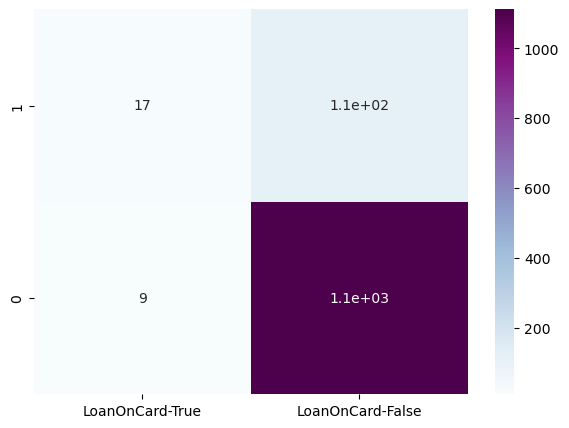

In [34]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["LoanOnCard-True","LoanOnCard-False"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='BuPu')
plt.show()

True Positives (TP): we correctly predicted that LoanOnCard is 17

True Negatives (TN): we correctly predicted its not LoanOncard 1100

False Positives (FP): we incorrectly predicted that its loanOncard (a "Type I error") 9 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted not loanOnCard (a "Type II error") 110 Falsely predict negative Type II error

Part 2.3 d - Print evaluation metrics for the model and 
clearly share insights.

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()
  
# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(y_train, 
                                         y_pred))

Accuracy score of  RandomForestClassifier = 92.16
Accuracy score of  KNeighborsClassifier = 91.60000000000001
Accuracy score of  SVC = 91.89333333333335
Accuracy score of  LogisticRegression = 91.70666666666666


In [36]:
for clf in (rfc, knn, svc,lc):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(y_test,
                                     y_pred))

Accuracy score of  RandomForestClassifier = 90.64
Accuracy score of  KNeighborsClassifier = 90.4
Accuracy score of  SVC = 90.24
Accuracy score of  LogisticRegression = 90.32


##### Logistic Regression Classifier is giving the best accuracy with an accuracy score of 88% for the testing dataset.

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))


knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.904
0.8992
0.8984


Preliminary model score:
0.8992


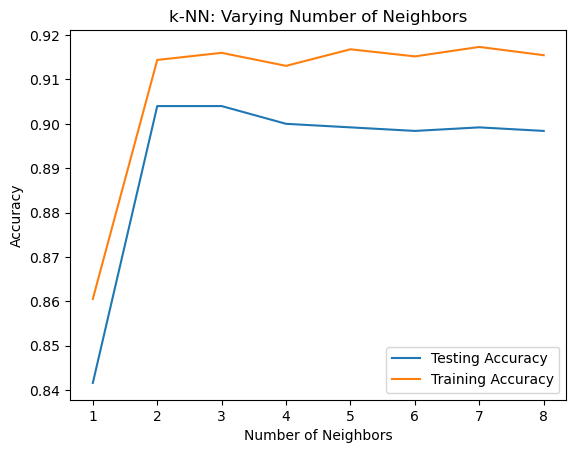

In [38]:
knn = KNeighborsClassifier(n_neighbors=11)  
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)

print("Preliminary model score:")
print(knn.score(x_test,y_test))

no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train,y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

After K=2 the test data and Train data falling apart.

In [39]:
myList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [40]:
ac_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

MSE = [1 - x for x in ac_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 3


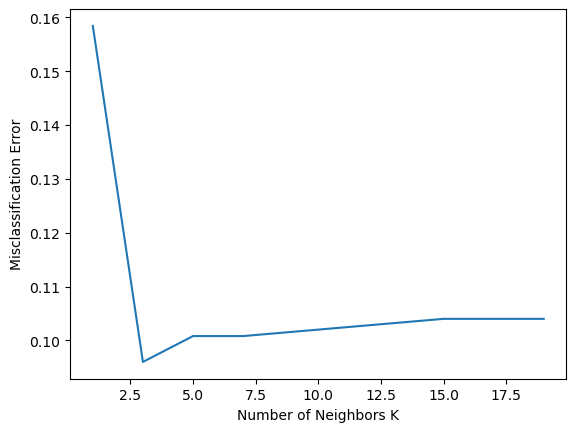

In [41]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [42]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8976
0.10077519379844961


Accuracy is 87 % which is more than recall which means the model returns relevant results than irrelevant ones.

Part 2.3 f- Again train the same previous model on 
balanced data

In [43]:
logreg = LogisticRegression(solver = 'liblinear', multi_class= 'auto')
logreg.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [44]:
lr_score = logreg.score(x_test, y_test)
print(f"Score : {lr_score}")

Score : 0.9032


In [45]:
pred = logreg.predict(x_test)  

In [46]:
def rightly_identified(actual, predictions):
    a = pd.DataFrame()

    for i in np.sort(actual.unique()):
        try:  
            a.loc[i,'total_instances'] = len(actual[actual == i]) 
            a.loc[i, 'identified_right'] = pd.Series(predictions[actual == i]).value_counts()[i] 
            a.loc[i, '%'] = round(100*pd.Series(predictions[actual == i]).value_counts()[i]/len(actual[actual == i]), 1) 
        except:  
            a.loc[i, '%'] = 0.0
    return a

In [47]:
pred_vs_actual_lr = rightly_identified(y_test, pred)
pred_vs_actual_lr

,total_instances,identified_right,%
0,1121.0,1112.0,99.2
1,129.0,17.0,13.2


the model has got 90% of False right and 72.7% it identifies True correctly.

Part 2.3 g- Print evaluation metrics and clearly share 
differences observed

In [48]:
def con_matrix(actual, predictions):
    from sklearn.metrics import confusion_matrix

    matrix = pd.DataFrame(confusion_matrix(actual, predictions), columns = np.unique(actual), index = np.unique(actual))    
    matrix.loc[:,'total_count_actual_class'] = matrix.sum(axis = 1) 
    matrix.loc['total_count_predicted'] = matrix.sum(axis = 0) 
    return matrix

In [49]:
con_matrix(y_test, pred)

,0,1,total_count_actual_class
0,1112,9,1121
1,112,17,129
total_count_predicted,1224,26,1250


The above table shows what is called as the 'Confusion matrix' and we have appended totals to it
The diagonal values tell us the count of correct predictions
From the table we can see, the model classified 42 instances from a total of 36 test reccords as False and  16 of them as True were correct

Part 2.4 a- Train a base model each for SVM, KNN 
SVM

In [50]:
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i] == predictions[i]:
            correct += 1
            return (correct/float(len(testSet))) * 100.0

In [51]:
Data.head()
Data.shape

(5000, 14)

In [52]:
X,y = np.array(Data)[ :, 1:15], np.array(Data.LoanOnCard)[:]
X_train = X[:3000, :]
X_test = X[3001: , :]
y_train = y[:3000]
y_test = y[3001:]

In [53]:
clf = SVC(gamma=0.025, C=3)  

In [54]:
clf.fit(X_train , y_train)

SVC(C=3, gamma=0.025)

In [55]:
y_pred = clf.predict(X_test)

In [56]:
getAccuracy(y_test , y_pred) 

0.05002501250625312

In [57]:
y_grid = (np.column_stack([y_test, y_pred]))

In [58]:
print(y_grid)

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [59]:
np.savetxt("ocr.csv", y_grid , fmt='%s')

<Axes: >

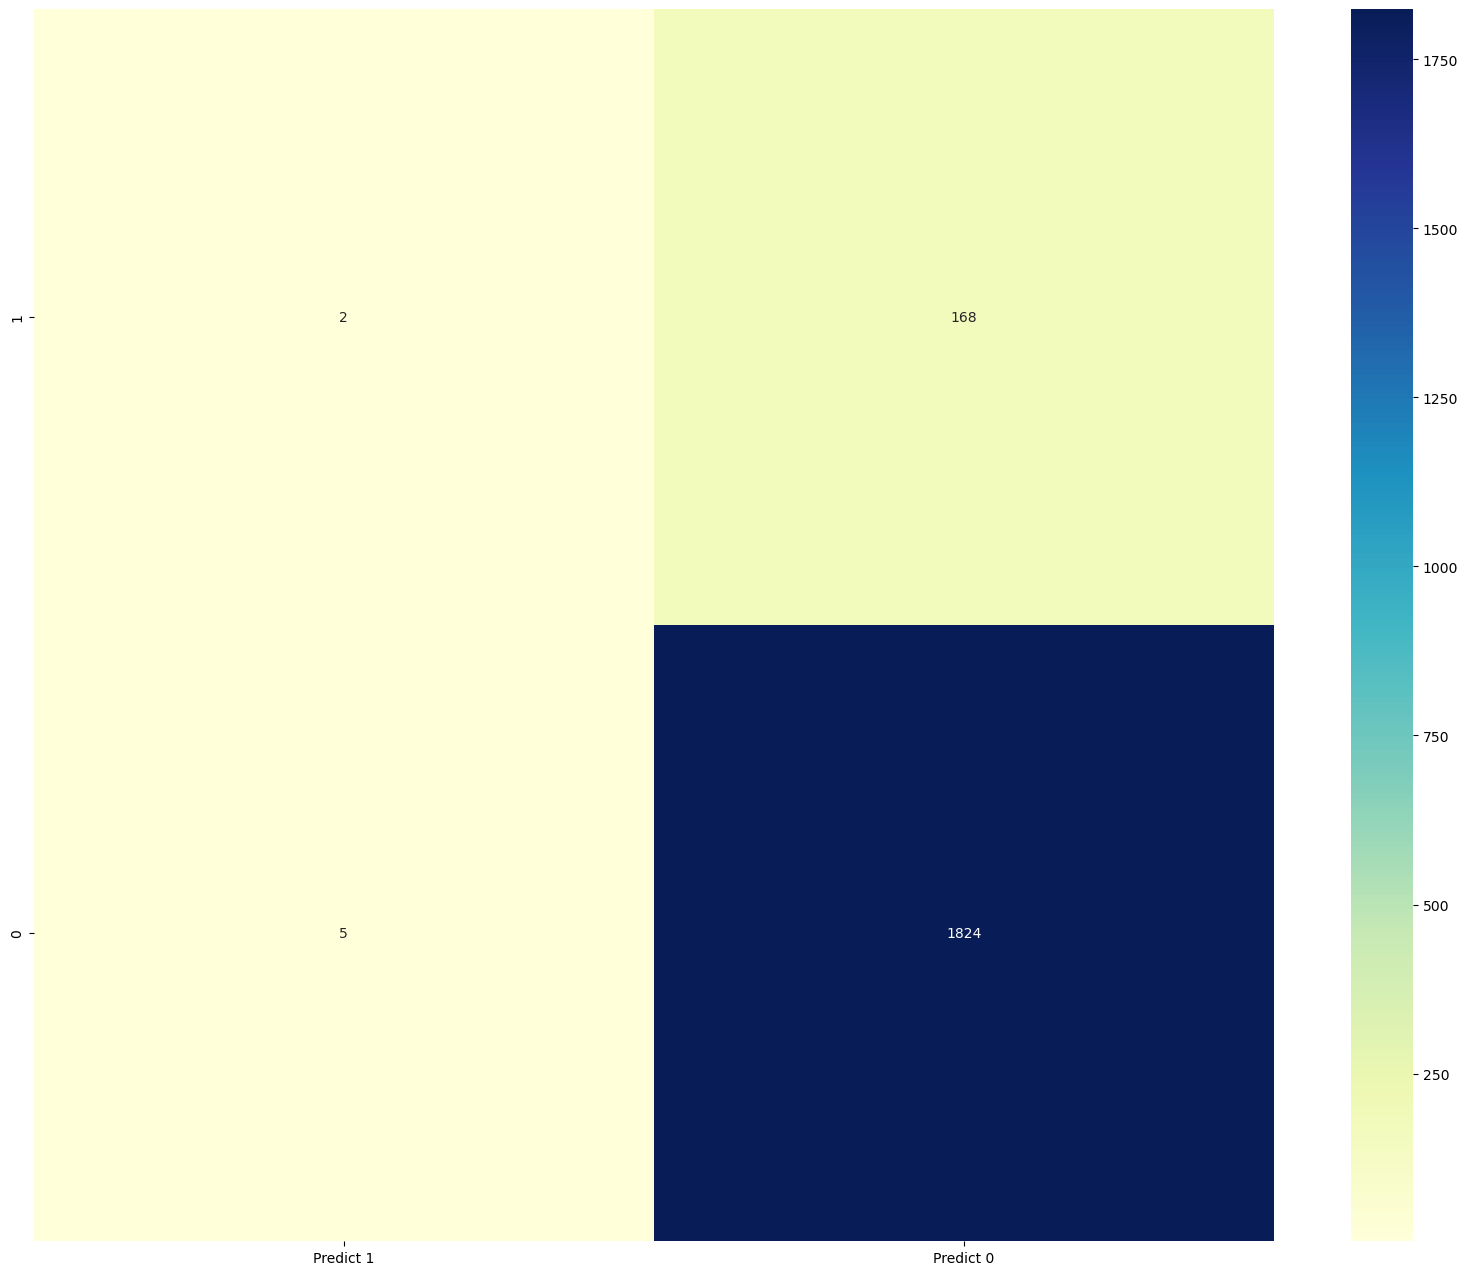

In [60]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (20,16))
sns.heatmap(df_cm, annot=True ,fmt='g',cmap='YlGnBu')



Part 2.4 b - Tune parameters for each of the models 
wherever required and finalize a mod
Part 2.4 c- Print evaluation metrics for final mode

In [61]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [62]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [63]:
knn_2 = KNeighborsClassifier()
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [64]:
best_model = clf.fit(X,y)

In [65]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1829
           1       0.82      0.42      0.55       170

    accuracy                           0.94      1999
   macro avg       0.88      0.70      0.76      1999
weighted avg       0.94      0.94      0.93      1999



0.70444955456212

Part 2.4 d- Share improvement achieved from base 
model to final model

After tuning the data , We can see the accuracy is increased by 94% from 89.76% and recall which is grater than accuracy that is  100% from KNN model is reduced 70 % which says that the model will return the relavant data than irrelavant data.